In [2]:
from numpy.linalg import inv
from scipy.linalg import eig
import numpy as np

from sklearn.datasets import make_swiss_roll
from sklearn.metrics import pairwise_distances

from diffmaps_util import *

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
%matplotlib nbagg

In [5]:
X, y = make_swiss_roll(n_samples=1000, noise=.5, random_state=0)
X[:5]

array([[ -8.90957272,  12.81407312,  -4.23871122],
       [  5.74063039,   0.19188496,  -9.22069784],
       [ -6.71566449,   9.97005042,  -7.8580488 ],
       [ -8.90294393,  15.01424466,  -3.28913359],
       [ -7.3395466 ,   0.88855582,   6.14576765]])

<IPython.core.display.Javascript object>


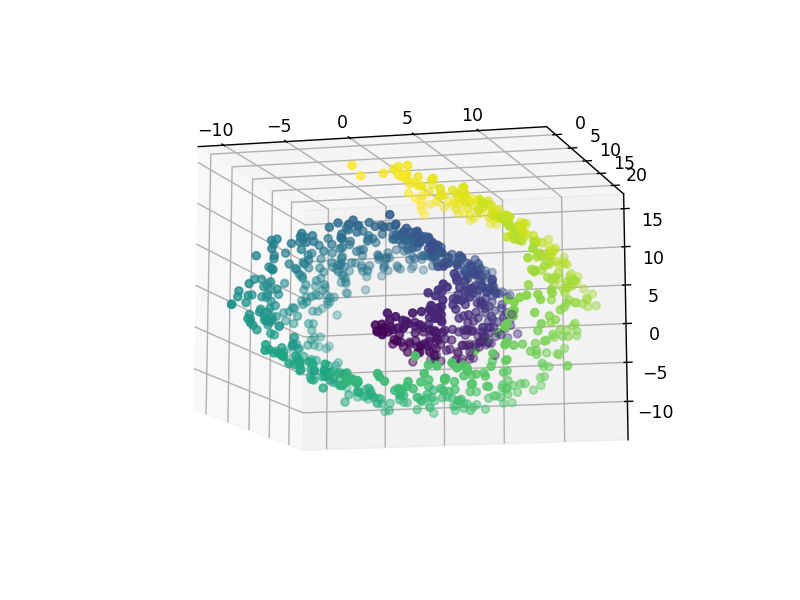

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)

In [6]:
L = k(X, 8.)
print 'L shape %s %s' % L.shape
D = diag(L)
print 'D shape %s %s' % D.shape

M = inv(D).dot(L)
print 'M shape %s %s' % M.shape

w, v = eig(M)
w = np.abs(w.real)
v = v.real
print 'eigenvalue shape %s' % w.shape
print 'eigenvector shape %s %s' % v.shape

L shape 1000 1000
D shape 1000 1000
M shape 1000 1000
eigenvalue shape 1000
eigenvector shape 1000 1000


In [7]:
w, v = sort_eigens(w, v)
print 'eigenvalue shape %s' % w.shape
print 'eigenvector shape %s %s' % v.shape

eigenvalue shape 1000
eigenvector shape 1000 1000


In [8]:
psi = v / v[:,0]
psi.shape

(1000L, 1000L)

In [9]:
diffmap = (w.reshape(-1,1) * psi.T).T[:,1:]
diffmap.shape

(1000L, 999L)

<IPython.core.display.Javascript object>


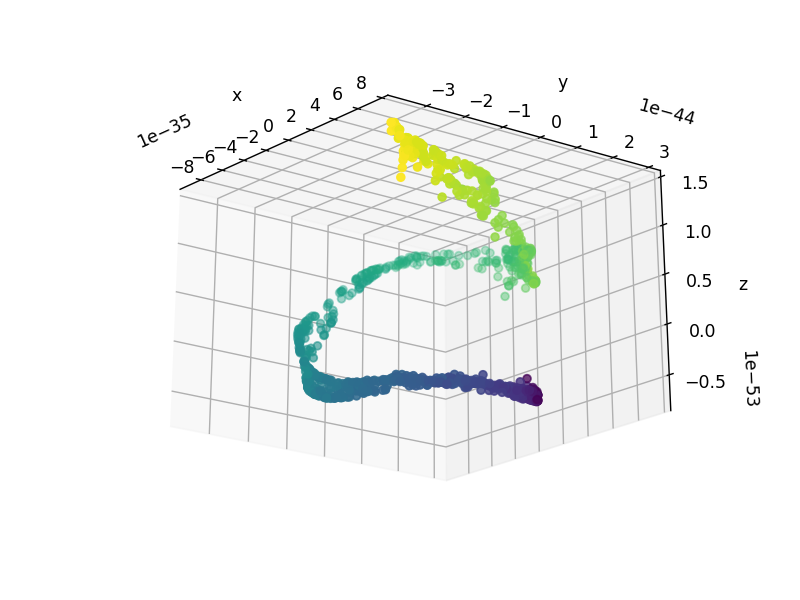

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
diffmap = (w.reshape(-1,1) ** 5000 * psi.T).T[:,1:]
diffmap.shape
ax.scatter(diffmap[:,0], diffmap[:,1], diffmap[:,2], c=y )
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')